In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters as fl
from skimage.color import rgb2gray
from skimage import io
from skimage.transform import resize
from skimage.filters import threshold_otsu, sobel
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage.feature import canny
from scipy import ndimage as ndi
import glob

In [2]:
def plot_image(img, title='Image'):
    plt.figure(figsize=[5,5])
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [43]:
img_path = '../data/201212005_LIMI_007612.jpg'

In [49]:
img = io.imread(img_path)
img = resize(img, (img.shape[0]//5, img.shape[1]//5), anti_aliasing=True)
img = img[:-50,:]
img_o =img.copy()

In [50]:
img.shape

(257, 408)

In [61]:
fr = fl.frangi(img)

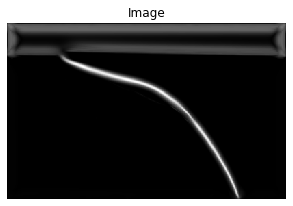

In [62]:
plot_image(fr)

In [57]:
fr = np.stack([fr,fr,fr],-1)

In [58]:
fr.shape

(257, 408, 3)

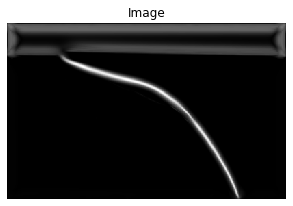

In [63]:
plot_image(fr)

In [18]:
thresh = threshold_otsu(img_o)
img[img>thresh]=1
img[img<=thresh]=0
img = closing(img,square(1))


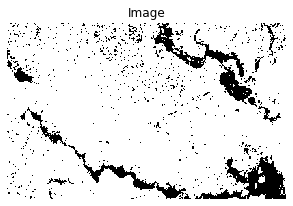

In [20]:
plot_image(img)

In [126]:
def normalise(img):
    img -= img.min()
    img /= img.max()
    return img

In [127]:
sigmas = [5,10,10]
sf = [5,15,15]
frangi = normalise(fl.frangi(img, sigmas=sigmas))
meij = normalise(fl.meijering(img, sigmas=sf))
sato = normalise(fl.sato(img, sigmas=sigmas))
hess = normalise(fl.hessian(img,sigmas=sigmas))

(-0.5, 407.5, 256.5, -0.5)

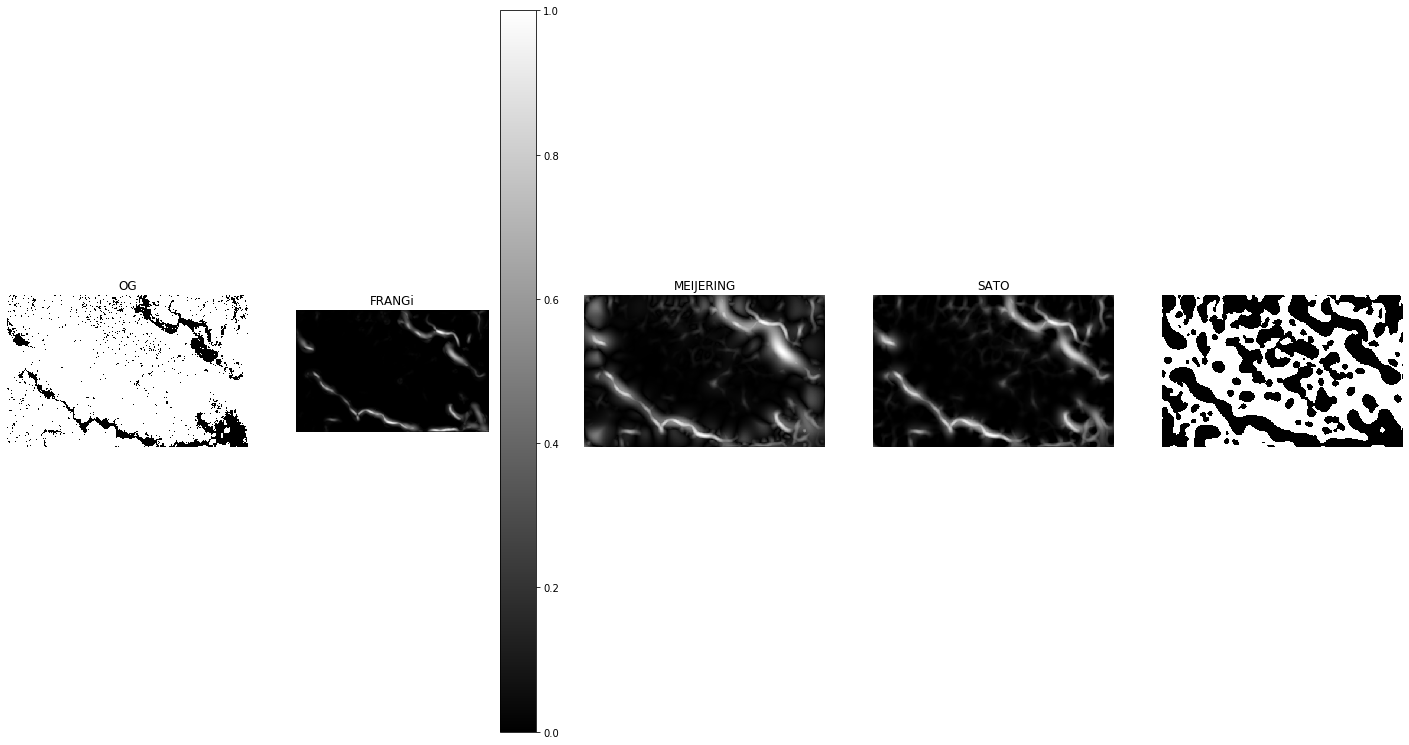

In [128]:

plt.figure(figsize=[25,20])
plt.subplot(151)
plt.imshow(img,cmap='gray')
plt.title('OG')
plt.axis('off')

plt.subplot(152)
plt.imshow(frangi,cmap='gray')
plt.colorbar()
plt.title('FRANGi')
plt.axis('off')

plt.subplot(153)
plt.imshow(meij,cmap='gray')

plt.title('MEIJERING')
plt.axis('off')

plt.subplot(154)
plt.title('SATO')
plt.imshow(sato,cmap='gray')
plt.axis('off')

plt.subplot(155)
plt.imshow(hess, cmap='gray')
plt.axis('off')

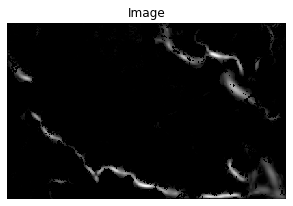

In [129]:
thresh = threshold_otsu(img)
bw = closing(img>thresh,square(3))

plot_image((1-img)*frangi)

In [130]:
img1 = img
img = (1-img)*frangi
img[img<0.5]=0
x,y = np.nonzero(img)

xm = x.min()
xma = x.max()
ym = y.min()
yma = y.max()

In [131]:
img.shape

(257, 408)

In [132]:
print(xm)
print(xma)
print(ym)
print(yma)

29
254
20
349


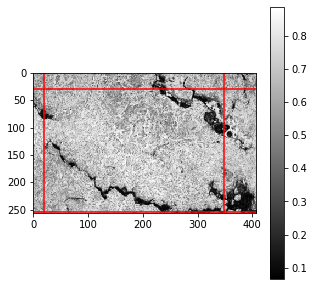

In [133]:
plt.figure(figsize=[5,5])
plt.imshow(img_o, cmap='gray')
plt.colorbar()
plt.axvline(ym,color='r')
plt.axvline(yma, color='r')
plt.axhline(xm,color='r')
plt.axhline(xma, color='r')
# plt.axis('off')

In [263]:
mc= label(sato,connectivity=2)

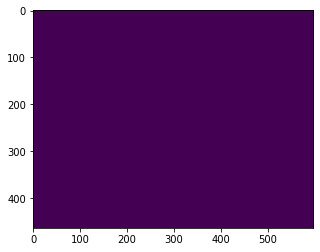

In [155]:
plt.imshow(mc)

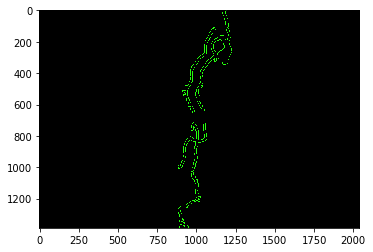

In [82]:
import cv2
import numpy as np

image = cv2.imread('../data/201310019_LIMI_008321.jpg')
image = image[:-150,...]
# image = (255*(1-fr)).astype(np.uint8)
# print(image.shape)
# image = 1-frangi
img = np.zeros_like(image)
blur = cv2.medianBlur(image, 45)
# blur = image
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)

canny = cv2.Canny(thresh, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
dilate = cv2.dilate(opening, kernel, iterations=2)

cnts = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 3000
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        cv2.drawContours(img, [c], -1, (36, 255, 12), 2)

plt.imshow(img)


In [76]:
img.shape

(1386, 2040, 3)

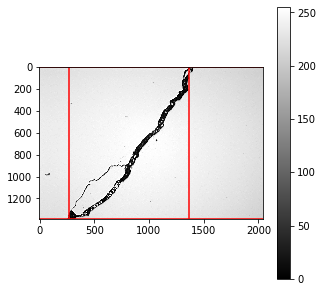

In [77]:
img = rgb2gray(img)
x,y = np.nonzero(img)

xm = x.min()
xma = x.max()

x, y = np.nonzero(img[xm+60:xma-60,:])
ym = y.min()
yma = y.max()

plt.figure(figsize=[5,5])
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.axvline(ym,color='r')
plt.axvline(yma, color='r')
plt.axhline(xm,color='r')
plt.axhline(xma, color='r')
# plt.axis('off')

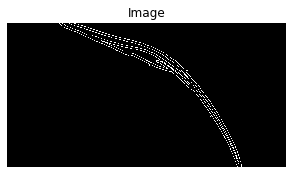

In [105]:
plot_image(img[xm+65:xma-65,:])

In [73]:
xm

193

In [74]:
xma

1528